In [1]:
import scanpy as sc
from bin import utils

In [9]:
import scanpy as scv

# 加载数据
adata = sc.read_10x_mtx(
    './upload/B646/filtered_feature_bc_matrix/',  # 这个路径应该包含 matrix.mtx.gz, genes.tsv 和 barcodes.tsv 文件
    var_names='gene_symbols',  # 使用基因名称作为变量名称
    cache=True
)

# 进行基本预处理
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# 计算质控指标
adata.var['mt'] = adata.var_names.str.startswith('mt-')
adata.var['rp'] = adata.var_names.str.startswith('Rp')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata, qc_vars=['rp'], percent_top=None, log1p=False, inplace=True)

# 过滤数据
adata = adata[adata.obs.pct_counts_mt < 5, :]
adata = adata[:, ~adata.var_names.str.startswith('Rp')]
adata = adata[adata.obs.n_genes_by_counts < 2500, :]

# 归一化和对数变换
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# # 标准化
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# adata = adata[:, adata.var.highly_variable]


/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [2]:
# 加载数据
adata = sc.read_10x_mtx(
    './upload/B646/filtered_feature_bc_matrix/',  # 这个路径应该包含 matrix.mtx.gz, genes.tsv 和 barcodes.tsv 文件
    var_names='gene_symbols',  # 使用基因名称作为变量名称
    cache=True,
    gex_only=False
)

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
adata.var_names[adata.var_names.str.startswith("Mt")]

Index(['Mterf4', 'Mtx2', 'Mtch2', 'Mtg2', 'Mtm1', 'Mtmr1', 'Mtcp1', 'Mtfr1',
       'Mtx1', 'Mtmr11', 'Mttp', 'Mtap', 'Mtf1', 'Mtfr1l', 'Mthfr', 'Mtor',
       'Mterf1a', 'Mterf1b', 'Mthfd2l', 'Mtf2', 'Mtif3', 'Mtus2', 'Mtpn',
       'Mturn', 'Mthfd2', 'Mtmr14', 'Mtag2', 'Mtmr10', 'Mtg1', 'Mthfd1l',
       'Mtrf1l', 'Mtfr2', 'Mterf2', 'Mtmr7', 'Mtus1', 'Mtnr1a', 'Mt4', 'Mt3',
       'Mt2', 'Mt1', 'Mtss1l', 'Mthfsd', 'Mtmr6', 'Mtmr9', 'Mtrf1', 'Mtmr2',
       'Mtnr1b', 'Mtfmt', 'Mto1', 'Mthfsl', 'Mthfs', 'Mtfp1', 'Mtmr3', 'Mtif2',
       'Mtmr4', 'Mtr', 'Mterf3', 'Mtrr', 'Mtx3', 'Mthfd1', 'Mta1', 'Mtmr12',
       'Mtdh', 'Mtbp', 'Mtss1', 'Mtch1', 'Mtcl1', 'Mta3', 'Mtpap', 'Mta2'],
      dtype='object')

In [5]:
sc.pl.umap(adata, color=['Cd3d', 'Cd3e', 'Cd3g', 'Cd8a', 'Cd8b1', 'Acta2', 'Col1a1', 'C1qa', 'Ccl12', 'Tgfbi', 'Epcam', 'Ccl5'], vmax=1)

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [25]:
adata.var.feature_types.unique()

array(['Gene Expression'], dtype=object)

In [1]:
# 进行 PCA 和聚类
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

# 绘制 UMAP 图
sc.pl.umap(adata, color=['leiden'])

NameError: name 'sc' is not defined

In [56]:
sc.tl.rank_genes_groups(adata, groupby='leiden')

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name,

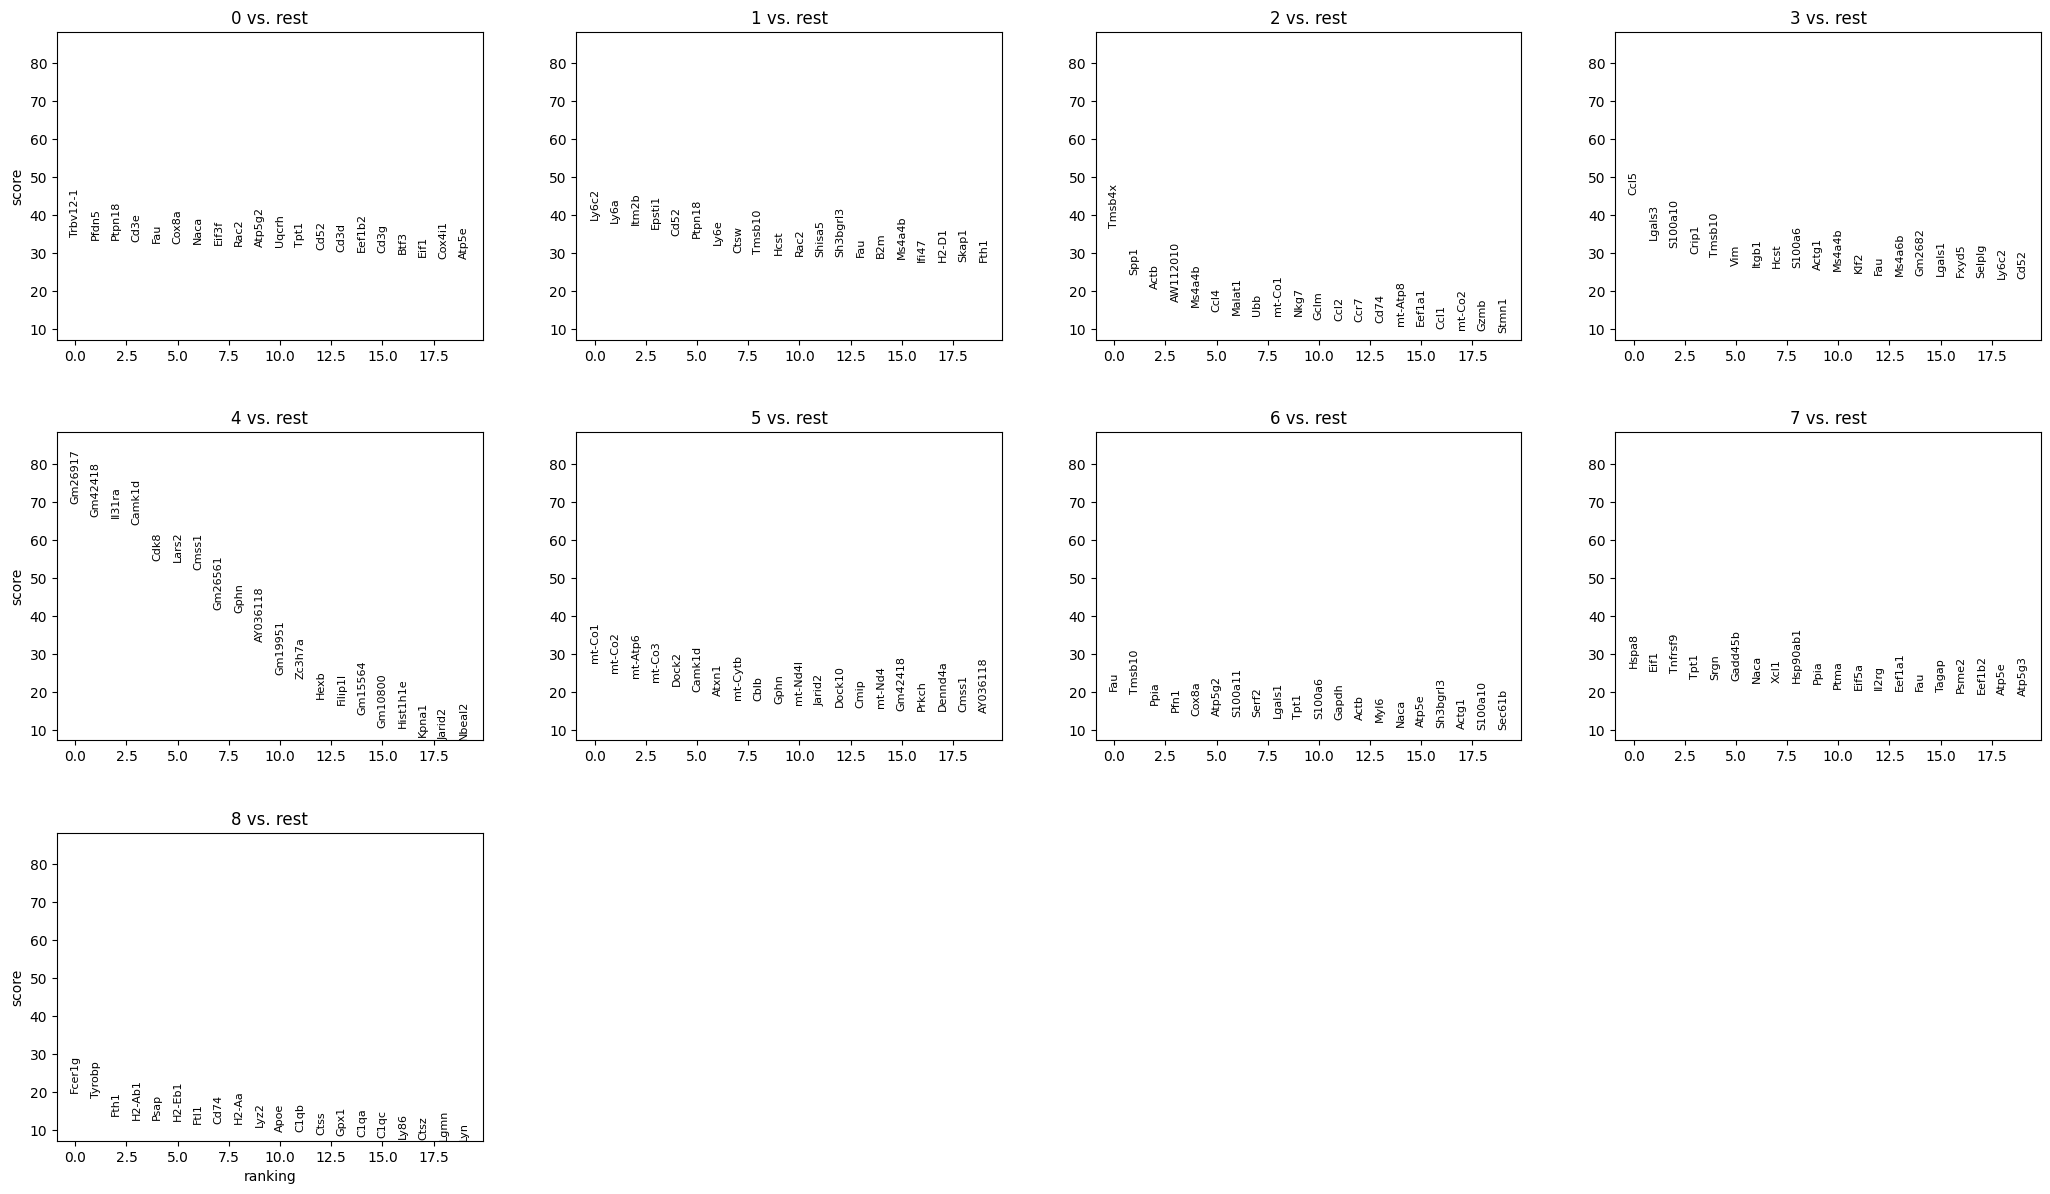

In [57]:
sc.pl.rank_genes_groups(adata)

In [61]:
T_marker = {
    "memory T": ["Il7r", "Cd27", "Timp1"],
    "effector T": ["Gzmk", "Gzma", "Gzmb", "Prf1", "Nkg7"],
    "exhausted T": ["Havcr2", "Lag3", "Entpd1", "Tigit", "Ctla4", "Layn"],
    "stem-like T": ["Tcf7", "Foxo1"]
}

In [62]:
for marker in T_marker:
    for s in T_marker[marker]:
        print(adata.var_names[adata.var_names.str.startswith(s)])

Index(['Il7r'], dtype='object')
Index(['Cd274'], dtype='object')
Index(['Timp1'], dtype='object')
Index(['Gzmk'], dtype='object')
Index([], dtype='object')
Index(['Gzmb'], dtype='object')
Index(['Prf1'], dtype='object')
Index([], dtype='object')
Index(['Havcr2'], dtype='object')
Index(['Lag3'], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


In [7]:
# 加载数据
adata = sc.read_10x_mtx(
    './upload/B646/filtered_feature_bc_matrix/',  # 这个路径应该包含 matrix.mtx.gz, genes.tsv 和 barcodes.tsv 文件
    var_names='gene_symbols',  # 使用基因名称作为变量名称
    cache=True
)

# 进行基本预处理
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

adata.var['mt'] = adata.var_names.str.startswith('mt-')

adata = utils.remove_mito_ribo_hk_lnc_genes(adata)
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata = adata[adata.obs.n_genes_by_counts < 2500, :]

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


In [8]:
t_marker = ['Cd8a', 'Cd8b1', 'Cd3e', 'Cd3d', 'Cd3g', 'Ccl5']
fdata = adata[adata[:, t_marker].X.sum(axis=1) > 0].copy()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


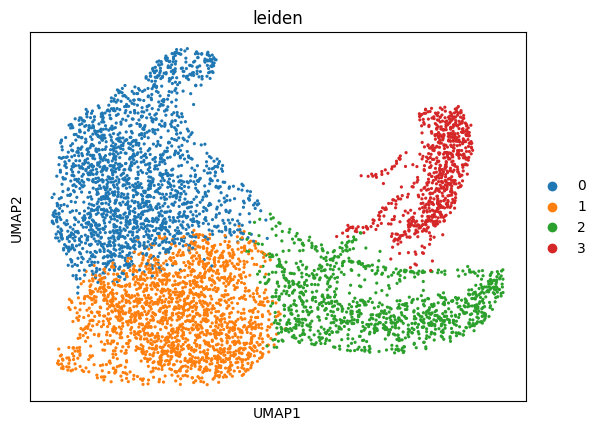

In [9]:
# 进行 PCA 和聚类
sc.pp.scale(fdata, max_value=10)
sc.tl.pca(fdata, svd_solver='arpack')
sc.pp.neighbors(fdata, n_neighbors=20, n_pcs=10)
sc.tl.umap(fdata)
sc.tl.leiden(fdata, resolution=0.2)

# 绘制 UMAP 图
sc.pl.umap(fdata, color=['leiden'])

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


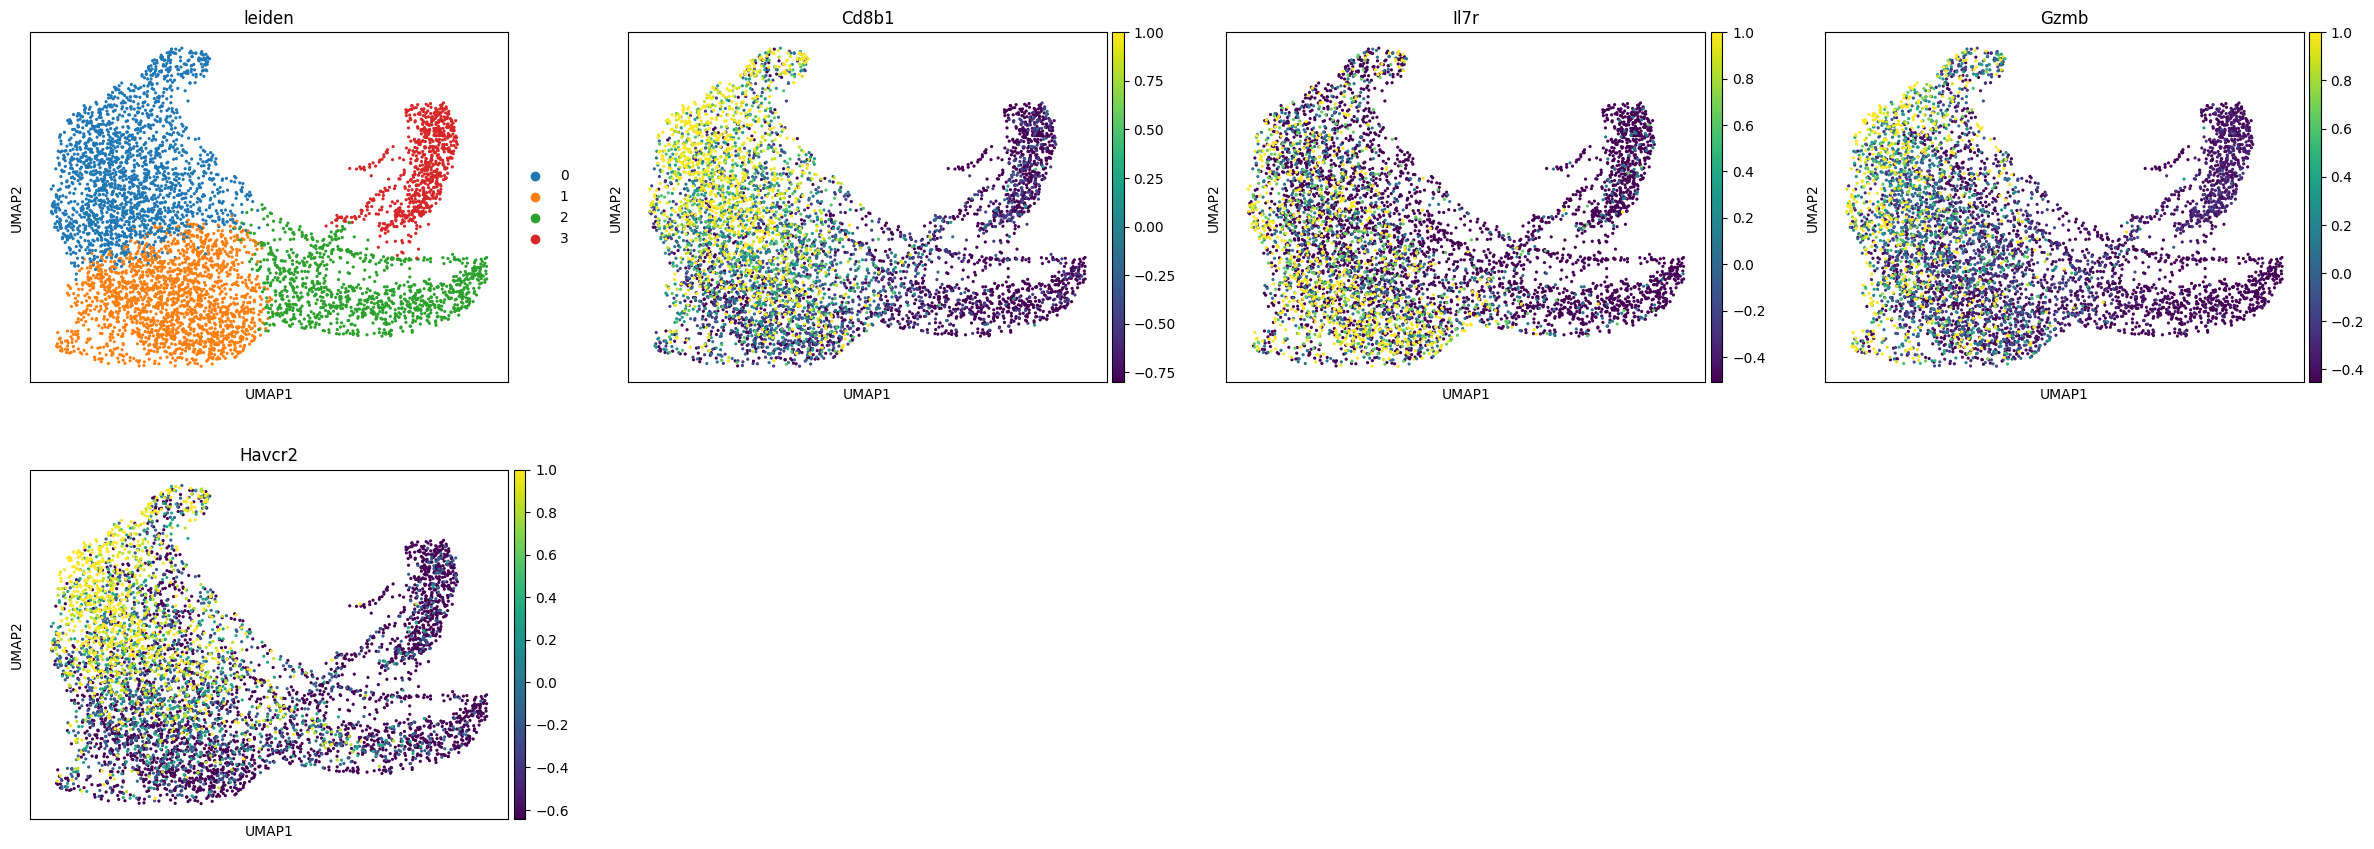

In [23]:
sc.pl.umap(fdata, color=['leiden', 'Cd8b1', 'Il7r', 'Gzmb', 'Havcr2'], vmax=1)

In [25]:
fdata.var

,gene_ids,feature_types,n_cells,mt,mt-,gm,Rb,rik,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mean,std
Xkr4,ENSMUSG00000051951,Gene Expression,7,False,False,False,False,False,7,0.001056,99.894435,7.0,0.000884,0.029730
Sox17,ENSMUSG00000025902,Gene Expression,5,False,False,False,False,False,5,0.003469,99.924597,23.0,0.000177,0.013300
Lypla1,ENSMUSG00000025903,Gene Expression,1308,False,False,False,False,False,1308,0.244609,80.274468,1622.0,0.218999,0.494284
Rgs20,ENSMUSG00000002459,Gene Expression,9,False,False,False,False,False,9,0.001508,99.864274,10.0,0.000177,0.013300
Atp6v1h,ENSMUSG00000033793,Gene Expression,1518,False,False,False,False,False,1518,0.304479,77.107525,2019.0,0.280028,0.574234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.2,ENSMUSG00000094915,Gene Expression,12,False,False,False,False,False,12,0.001810,99.819032,12.0,0.001415,0.037596
AC168977.1,ENSMUSG00000079808,Gene Expression,17,False,False,False,False,False,17,0.002564,99.743628,17.0,0.002653,0.051448
AC149090.1,ENSMUSG00000095041,Gene Expression,2521,False,False,False,False,False,2521,0.610014,61.981602,4045.0,0.589068,0.990079
CAAA01118383.1,ENSMUSG00000063897,Gene Expression,1718,False,False,False,False,False,1718,0.353793,74.091389,2346.0,0.305148,0.602046


/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


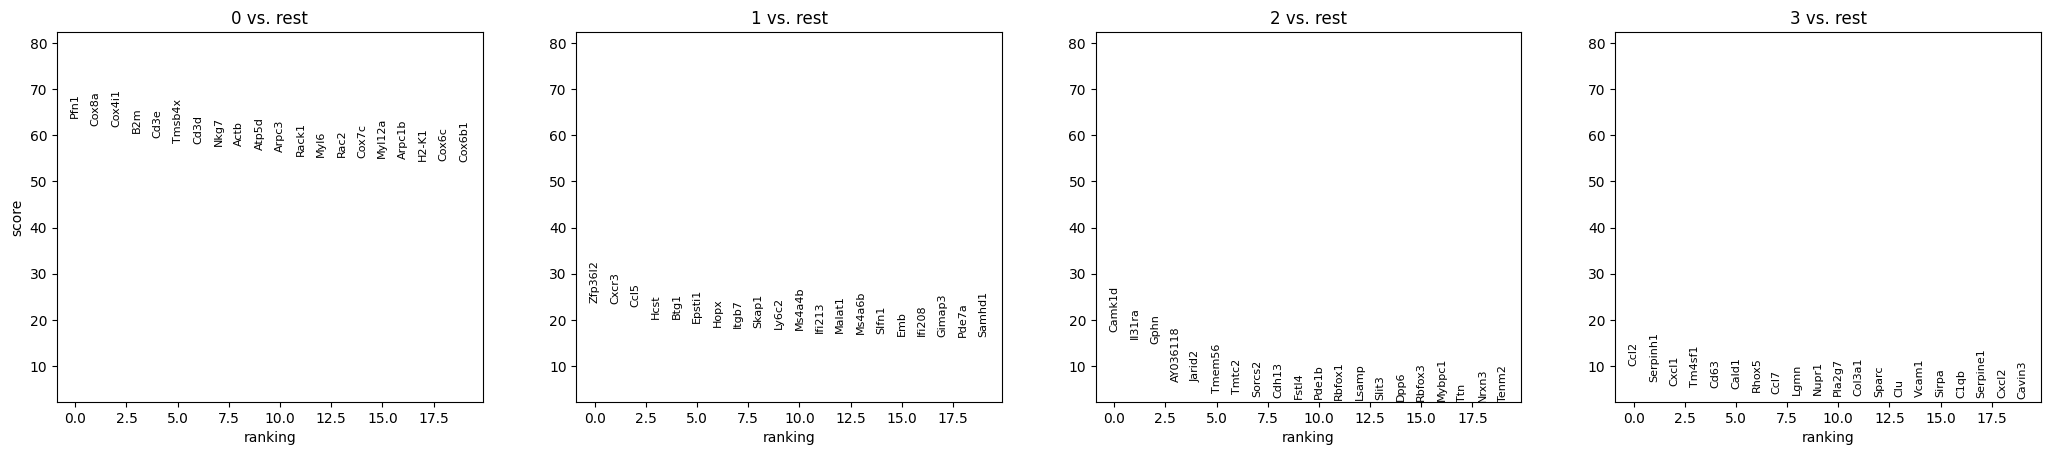

In [11]:
sc.tl.rank_genes_groups(fdata, method='t-test', groupby='leiden')
sc.pl.rank_genes_groups(fdata)

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated an

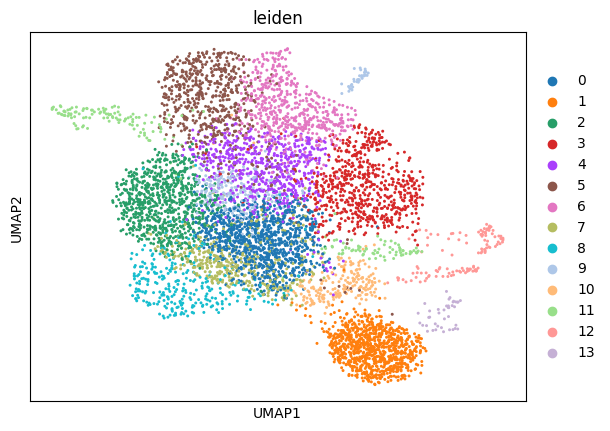

In [6]:
import scanpy as sc

# 加载数据
adata = sc.read_10x_mtx(
    './upload/B647/filtered_feature_bc_matrix/',  # 这个路径应该包含 matrix.mtx.gz, genes.tsv 和 barcodes.tsv 文件
    var_names='gene_symbols',  # 使用基因名称作为变量名称
    cache=True
)

# 进行基本预处理
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# 计算质控指标
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # 假设线粒体基因以 'MT-' 开头
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# 过滤数据
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

# 归一化和对数变换
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# 标准化
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

# 进行 PCA 和聚类
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)

# 绘制 UMAP 图
sc.pl.umap(adata, color=['leiden'])
